In [1]:
1+1

2

In [2]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [4]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data

/home/yulia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load the data

In [10]:
pwd

'/home/yulia/final-project/Classification'

In [4]:
data_path = '/home/yulia/final-project/data/raw/hein-daily'

In [5]:
reload(load_data)
all_speech_ids, all_speeches = load_data.load_speech_data(data_path)


File speeches_097.txt has 249718612 characters
and 283399 speeches

Speeches list has 283399 speeches

File speeches_098.txt has 252071246 characters
and 280289 speeches

Speeches list has 563688 speeches

File speeches_099.txt has 265326480 characters
and 281528 speeches

Speeches list has 845216 speeches

File speeches_100.txt has 270610780 characters
and 276162 speeches

Speeches list has 1121378 speeches

File speeches_101.txt has 261004871 characters
and 251217 speeches

Speeches list has 1372595 speeches

File speeches_102.txt has 271650630 characters
and 243092 speeches

Speeches list has 1615687 speeches

File speeches_103.txt has 249908822 characters
and 235974 speeches

Speeches list has 1851661 speeches

File speeches_104.txt has 280355367 characters
and 274985 speeches

Speeches list has 2126646 speeches

File speeches_105.txt has 235226903 characters
and 209267 speeches

Speeches list has 2335913 speeches

File speeches_106.txt has 243801385 characters
and 209648 speeches

In [6]:
len(all_speech_ids), len(all_speeches)

(3866201, 3866201)

## Create target labels

In [5]:
# OPEN descr FROM A SAVED FILE (if it was previously saved)
outdata_path = '/home/yulia/final-project/Classification/data'
descr = pickle.load(open(os.path.join(outdata_path, 'descr.p'), 'rb'))

In [6]:
len(descr)

865714

In [7]:
reload(load_data)
start_time = time.time()
# taking a 30% sample of the full description file
descr = load_data.load_descr_data('/home/yulia/final-project/data/QA/full_descr.txt')
print("\nIt took {0:.1f} seconds to create the dictionary".format(time.time()-start_time))

2914465 lines have been read
37617 keys had duplicates and deleted
The dictionary has 2808050 keys

Random congressperson: 1090182100
date 20061114
char_count 278
word_count 49
speakerid 109112991.0
Party R
Congress 109
Chamber S
State TN
Ethnicity W
Age 54.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. FRIST
Full Name FRIST, WILLIAM
match exact
check 1

It took 23.1 seconds to create the dictionary


In [8]:
# check if sampling worked
len(list(descr.keys()))/2914464

0.9634876258550458

In [ ]:
gender = load_data.create_target_labels(all_speech_ids, descr)[0]
len(gender)

### Save descr dictionary

In [10]:
pickle.dump(descr, open(os.path.join(outdata_path, 'descr.p'), 'wb'))

### Data QA

In [11]:
explore_data.get_counts(gender)

,Category,Count
0,-1,1058151
1,0,2579578
2,1,228472


In [12]:
reload(explore_data)
explore_data.random_speech(all_speeches, all_speech_ids, gender, descr)

Speaker information
date 19900910
char_count 3680
word_count 553
speakerid 101121080.0
Party R
Congress 101
Chamber H
State FL
Ethnicity H
Age 38.0
Age_lt_med 1.0
NonWhite 1.0
Female 1.0
speaker Ms. ROS-LEHTINEN
Full Name ROS-LEHTINEN, ILEANA
match fuzzy
check 1

Mr. Speaker. I would like to bring to your attention the many accomplishments of the Miami Job Corps Center. which is a federally funded program contracted by RESCARE. Inc.. in Louisville. KY. Rated among the top ten Job Corps Centers in the country. the Miami Job Corps Center helps young people to overcome various problems they have experienced in their personal lives and become productive and selfsufficient citizens. The success of the Miami Job Corps is largely owed to the excellent leadership and guidance provided by Mr. Don E. DeJarnett. Mr. DeJarnett came to Miami approximately 7 years ago from Kentucky. where he was the deputy center director at the Whitney M. Young Job Corps Program. for 19 years. From his earlier posi

# Gender Model

## Split into train, validate, test

In [13]:
reload(preprocess_data)
train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_train_val_test(all_speeches, all_speech_ids, gender, descr)

Training split: 94074 ones and 94074 zeroes
Training speech list size: 188148
Training target list size: 188148
Validation split: 31358 ones and 31358 zeroes
Validation speech list size: 62716
Validation target list size: 62716
Test split: 31358 ones and 31358 zeroes
Test speech list size: 62716
Test target list size: 62716


In [14]:
sum(train_target), sum(val_target), sum(test_target)

(94074, 31358, 31358)

In [15]:
# number of speeches under 30 words
sum(np.array(gender)==1) - (sum(train_target) + sum(val_target) + sum(test_target))

71682

In [16]:
# random speech from a train set where gender=1
explore_data.random_speech(train, train_ids, train_target, descr)

Speaker information
date 19930727
char_count 3065
word_count 544
speakerid 103120621.0
Party D
Congress 103
Chamber S
State WA
Ethnicity W
Age 44.0
Age_lt_med 1.0
NonWhite 0.0
Female 1.0
speaker Mrs. MURRAY
Full Name MURRAY, PATTY
match exact
check 1

Thank you. Mr. President. I thank my colleague for yielding me time. I thank him also for his words on this issue. He is exactly right. This is an issue of home rule. I urge my colleagues to support the committee amendment. to vote yes on this amendment. to do as the committee wisely did and to remain silent on the District of Columbias 1992 Health Care Benefits Expansion Act. A vote yes will say that this Senate will remain silent on that issue. The District of Columbia debated the issue on its own. They decided how their own funds would be spent. and this Senate has to make sure that we do not have 100 mayors of the District of Columbia but. rather. allow them to use their funds as they see fit. I think it is very important for all of u

#### Cleanup

In [18]:
del all_speech_ids, all_speeches, gender

## EDA on train data

Source: https://developers.google.com/machine-learning/guides/text-classification/step-2

### Check median number of words per sample in train/val/test

In [27]:
reload(explore_data)

<module 'helpers.explore_data' from '/home/yulia/final-project/Classification/helpers/explore_data.py'>

In [21]:
explore_data.get_num_words_per_sample(train)

249.0

In [22]:
explore_data.get_num_words_per_sample(val)

248.0

In [23]:
explore_data.get_num_words_per_sample(test)

247.0

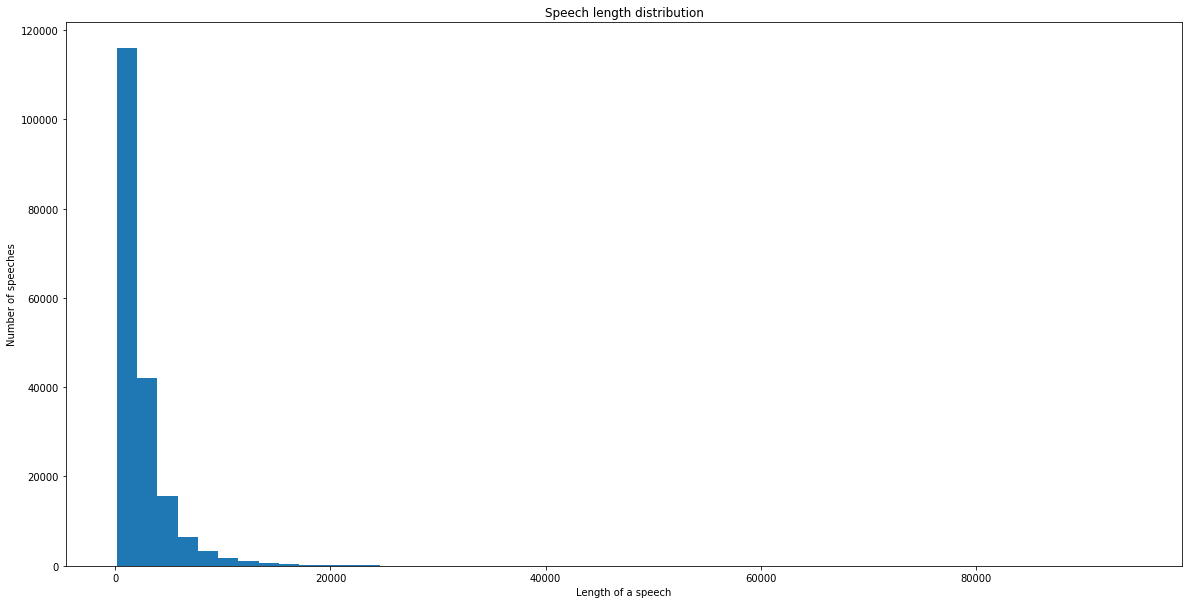

In [24]:
explore_data.plot_sample_length_distribution(train)

### Most popular unigrams (training only)

In [22]:
# take a sample to avoid running out of memory
train_sample = random.sample(train, int(len(train)*0.2))
len(train_sample)

11561

['the', 'to', 'of', 'and', 'in', 'that', 'is', 'for', 'this', 'we', 'it', 'on', 'have', 'are', 'as', 'not', 'be', 'our', 'with', 'will', 'from', 'by', 'they', 'has', 'mr', 'was', 'would', 'my', 'their', 'an', 'bill', 'at', 'who', 'but', 'he', 'all', 'or', 'his', 'do', 'people', 'president', 'which', 'been', 'these', 'about', 'there', 'what', 'so', 'you', 'more']


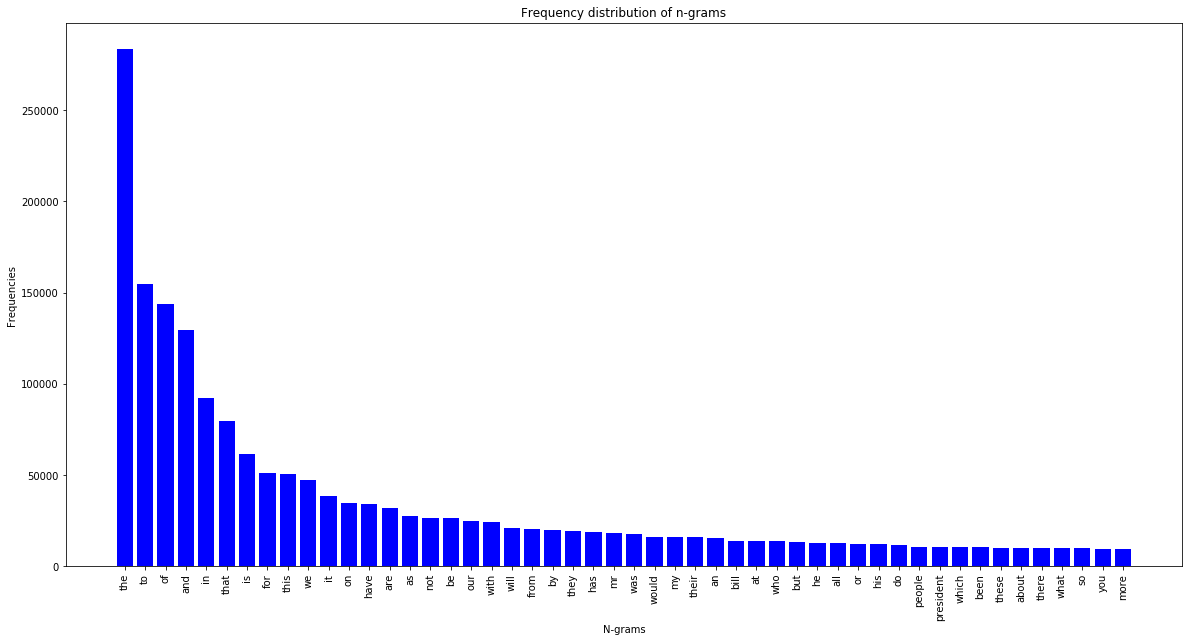

In [23]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(1,1))

### Most popular bigrams (training only)

['of the', 'in the', 'to the', 'it is', 'and the', 'on the', 'for the', 'that the', 'mr speaker', 'to be', 'we have', 'we are', 'that is', 'that we', 'by the', 'with the', 'of this', 'in this', 'united states', 'the united', 'is the', 'this bill', 'mr president', 'going to', 'at the', 'this is', 'want to', 'will be', 'of our', 'from the', 'has been', 'is not', 'my colleagues', 'have been', 'the senate', 'they are', 'the bill', 'the gentleman', 'do not', 'there is', 'to do', 'the house', 'one of', 'as the', 'the american', 'would be', 'to make', 'have to', 'the president', 'we can']


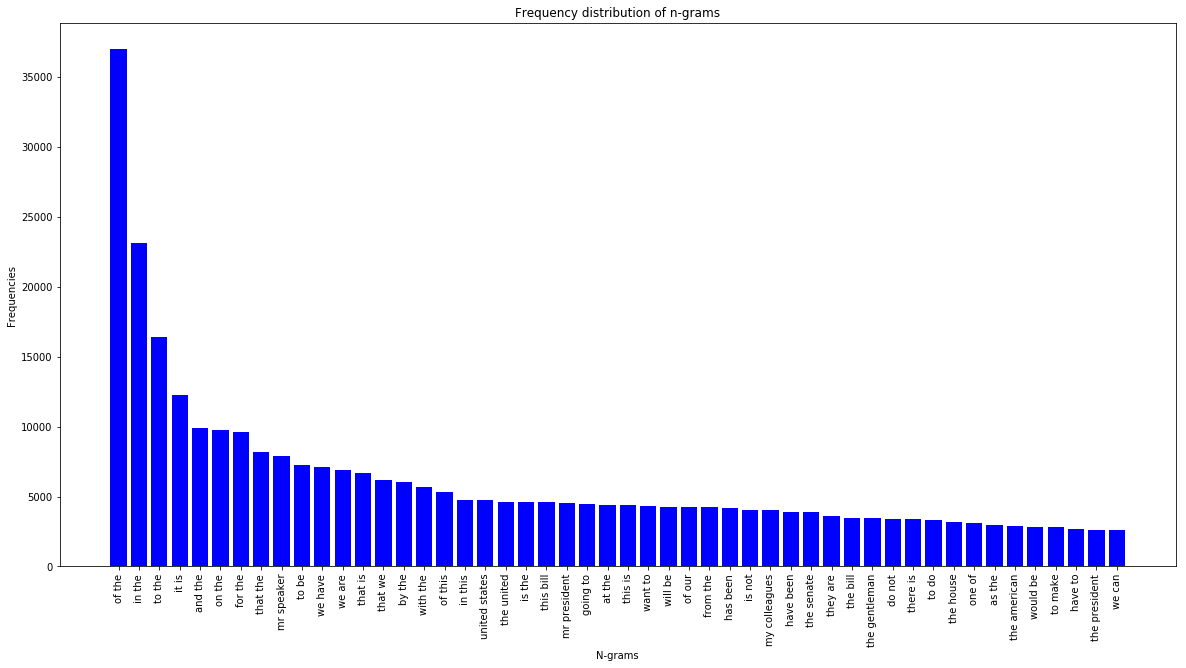

In [24]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(2,2))

### Most popular trigrams (training only)

#### Run this only on small samples

['the united states', 'the gentleman from', 'one of the', 'are going to', 'my colleagues to', 'would like to', 'the american people', 'the senator from', 'be able to', 'the department of', 'we need to', 'of the united', 'mr speaker rise', 'as well as', 'the federal government', 'urge my colleagues', 'member of the', 'we are going', 'in the united', 'is going to', 'it is not', 'that we have', 'rise today to', 'chairman of the', 'in this country', 'in order to', 'that we are', 'ask unanimous consent', 'in support of', 'there is no', 'the committee on', 'going to be', 'part of the', 'some of the', 'percent of the', 'men and women', 'speaker rise today', 'the fact that', 'the people of', 'we do not', 'the state of', 'thank the gentleman', 'we have to', 'members of the', 'and that is', 'of the senate', 'unanimous consent that', 'of the house', 'and it is', 'that is the']


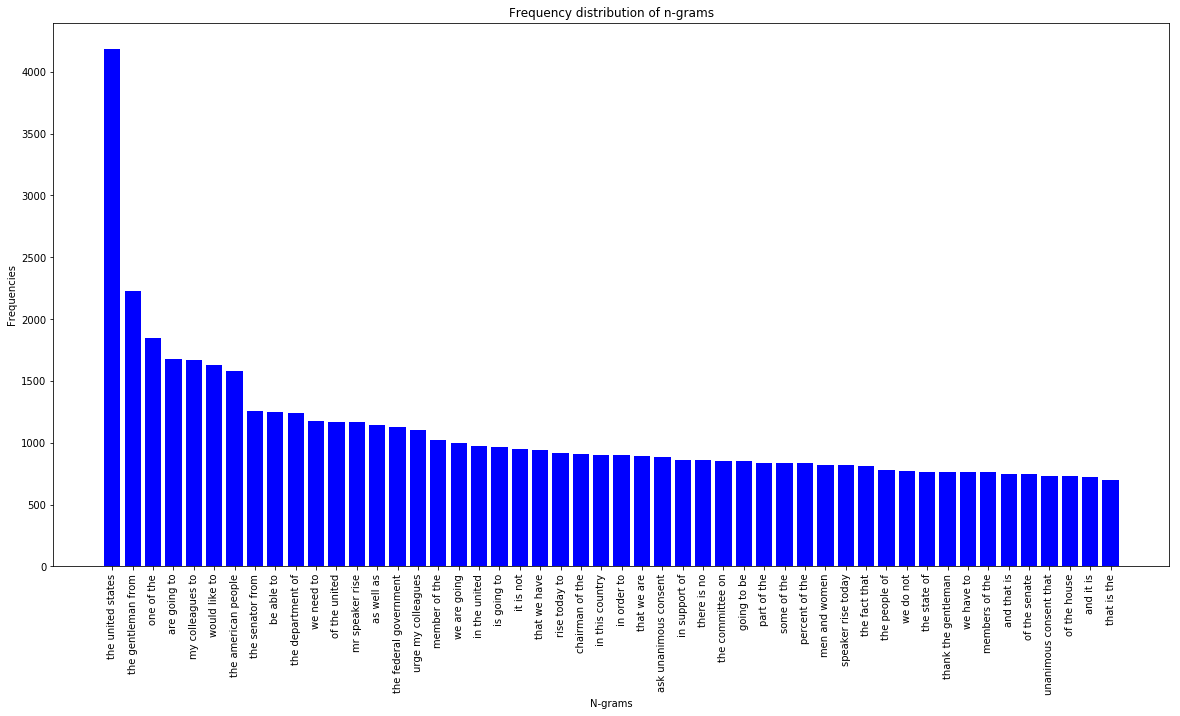

In [25]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(3,3))

In [27]:
congress = set([str(i) for i in range(97,115)])

In [29]:
reload(explore_data)
explore_data.ngrams_by_category(train, train_ids, descr, congress, 'Congress', p=0.3, top_n=5)


For Congress 108 top 5 (3, 3) ngrams are:
the united states
the gentleman from
are going to
one of the
my colleagues to
--------------------

For Congress 101 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
the senator from
--------------------

For Congress 103 top 5 (3, 3) ngrams are:
the united states
the gentleman from
are going to
the senator from
one of the
--------------------

For Congress 104 top 5 (3, 3) ngrams are:
the united states
the gentleman from
are going to
the american people
would like to
--------------------

For Congress 98 top 5 (3, 3) ngrams are:
the united states
would like to
the gentleman from
the senator from
one of the
--------------------

For Congress 102 top 5 (3, 3) ngrams are:
the united states
the gentleman from
would like to
one of the
my colleagues to
--------------------

For Congress 112 top 5 (3, 3) ngrams are:
the united states
the american people
my colleagues to
we need to
one of the
--------------------

## N-gram model

Inspiration for code: https://developers.google.com/machine-learning/guides/text-classification/step-3

### Pre-processing

In [31]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Output number of top/bottom scoring ngrams
TOP_N = 5

vec_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [32]:
reload(preprocess_data)
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **vec_params)

Total vocabulary size: 981956
Number of stop words 6743722

Top 5 ngrams by differentiating score:
mr president 	 6172.1
women 	 4355.9
president 	 3945.5
rise 	 3786.8
our 	 3697.8

Bottom 5 ngrams by differentiating score:
reported version 	 0.0
conditions upon 	 0.0
this premise 	 0.0
has proved 	 0.0
had risen 	 0.0


In [33]:
len(train), len(val), len(test)

(188148, 62716, 62716)

In [34]:
train_vec.shape, val_vec.shape, test_vec.shape

((188148, 10000), (62716, 10000), (62716, 10000))

### Saving processed files

In [40]:
pwd

'/home/yulia/final-project/Classification'

In [5]:
outdata_path = '/home/yulia/final-project/Classification/data'

In [36]:
scipy.sparse.save_npz(os.path.join(outdata_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'test_vec.npz'), test_vec)

In [33]:
train_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'test_vec.npz'))

In [ ]:
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))

In [34]:
train_vec.shape, val_vec.shape, test_vec.shape

((57808, 10000), (19268, 10000), (19272, 10000))

In [37]:
with open(os.path.join(outdata_path, 'train_list'), 'wb') as fp:
    pickle.dump(train, fp)
with open(os.path.join(outdata_path, 'train_ids'), 'wb') as fp:
    pickle.dump(train_ids, fp)
with open(os.path.join(outdata_path, 'train_target'), 'wb') as fp:
    pickle.dump(train_target, fp)
with open(os.path.join(outdata_path, 'val_list'), 'wb') as fp:
    pickle.dump(val, fp)
with open(os.path.join(outdata_path, 'val_ids'), 'wb') as fp:
    pickle.dump(val_ids, fp)
with open(os.path.join(outdata_path, 'val_target'), 'wb') as fp:
    pickle.dump(val_target, fp)
with open(os.path.join(outdata_path, 'test_list'), 'wb') as fp:
    pickle.dump(test, fp)
with open(os.path.join(outdata_path, 'test_ids'), 'wb') as fp:
    pickle.dump(test_ids, fp)
with open(os.path.join(outdata_path, 'test_target'), 'wb') as fp:
    pickle.dump(test_target, fp)

In [38]:
sum(train_target), sum(val_target), sum(test_target)

(94074, 31358, 31358)

In [ ]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)

In [6]:
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [7]:
sum(val_target), len(val_target)

(31358, 62716)

In [ ]:
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [ ]:
sum(train_target), sum(val_target), sum(test_target)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [40]:
logs_base_dir = "/home/yulia/final-project/Classification/logs"

In [ ]:
ngram_model_params = {
    'model': 'ngram',
    'log_dir': logs_base_dir,
    'learning_rate': 1e-3,
    'epochs': 1000,
    'batch_size': 128,
    'layers': 2,
    'units': 64,
    'dropout_rate': 0.2
}

In [44]:
reload(train_model)
history, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), **ngram_model_params)

Train on 188148 samples, validate on 62716 samples
Epoch 1/1000
 - 47s - loss: 0.5475 - acc: 0.7208 - val_loss: 0.5206 - val_acc: 0.7374
Epoch 2/1000
 - 45s - loss: 0.5094 - acc: 0.7439 - val_loss: 0.5142 - val_acc: 0.7419
Epoch 3/1000
 - 45s - loss: 0.4954 - acc: 0.7528 - val_loss: 0.5113 - val_acc: 0.7433
Epoch 4/1000
 - 45s - loss: 0.4863 - acc: 0.7587 - val_loss: 0.5083 - val_acc: 0.7480
Epoch 5/1000
 - 46s - loss: 0.4752 - acc: 0.7672 - val_loss: 0.5073 - val_acc: 0.7482
Epoch 6/1000
 - 46s - loss: 0.4643 - acc: 0.7748 - val_loss: 0.5051 - val_acc: 0.7502
Epoch 7/1000
 - 46s - loss: 0.4527 - acc: 0.7822 - val_loss: 0.5041 - val_acc: 0.7525
Epoch 8/1000
 - 46s - loss: 0.4398 - acc: 0.7919 - val_loss: 0.5040 - val_acc: 0.7526
Epoch 9/1000
 - 47s - loss: 0.4266 - acc: 0.7997 - val_loss: 0.5050 - val_acc: 0.7541
Epoch 10/1000
 - 46s - loss: 0.4127 - acc: 0.8083 - val_loss: 0.5083 - val_acc: 0.7543
Validation accuracy: 0.7543210664097467, loss: 0.5083065646891768


## Model evaluation

In [45]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

47308

Confusion matrix, without normalization
[[23166  8192]
 [ 7216 24142]]


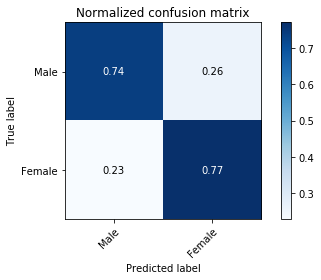

In [46]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['Male', 'Female']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

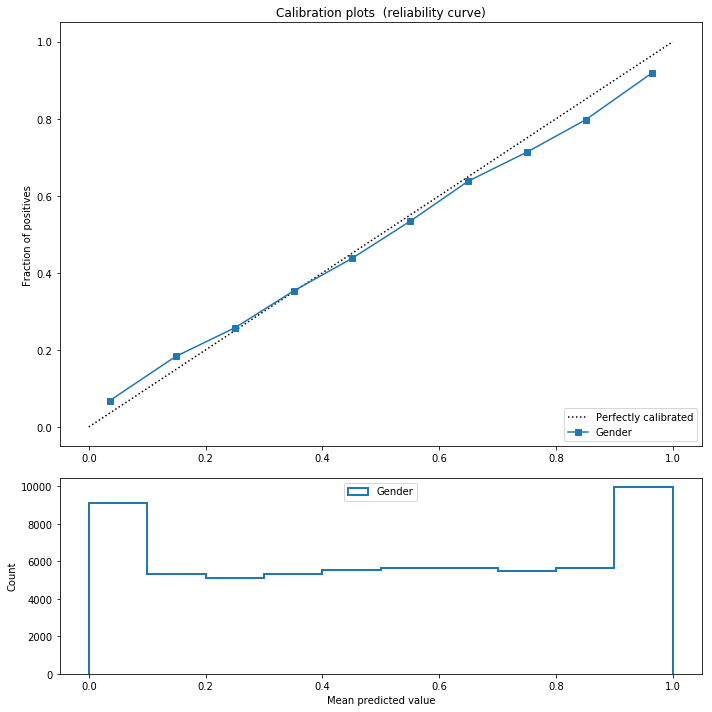

In [47]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Gender')

In [49]:
del train, train_ids, train_pred_probs, train_target, train_vec

In [53]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'wb') as fp:
    pickle.dump(val_pred_probs, fp)

In [8]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'rb') as fp:
    val_pred_probs = pickle.load(fp)

In [9]:
val_pred_probs.shape

(62716, 1)

In [10]:
descr_df = pd.read_csv('/home/yulia/final-project/data/QA/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/home/yulia/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(62716, 16)

In [11]:
descr_df.head()

,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
speech_id,,,,,,,,,,,,,,,,
1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,66.0,0.0,0.0,1.0,Mrs. CAPPS,"CAPPS, LOIS",fuzzy
1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,58.0,0.0,1.0,1.0,Ms. LEE,"LEE, BARBARA",fuzzy
1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,49.0,1.0,1.0,1.0,Ms. SOLIS,"SOLIS, HILDA",exact
1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,56.0,0.0,0.0,1.0,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact
1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,59.0,0.0,0.0,1.0,Mrs. DRAKE,"DRAKE, THELMA",exact


In [56]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs, 
                                   val_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.39,0.41,0.99,0.82,0.75,0.94
0.6,0.97,0.83,0.98,0.93,1.11,0.83
1.0,1.58,1.62,1.01,1.19,1.19,1.12


In [10]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
sonoma 	 11479.1
sonoma county 	 9561.5
the sonoma 	 4714.7
in sonoma 	 4674.3
of sonoma 	 3948.5
smart security 	 3922.0
century smart 	 3723.2
smart stands 	 3291.8
create smart 	 3056.8
multilateral partnerships 	 2736.7


bin,1,2,3,4
century smart,0.0,0.0,1.0,8.0
create smart,0.0,0.0,0.0,6.0
in sonoma,0.0,0.0,13.0,24.0
multilateral partnerships,0.0,0.0,0.0,7.0
of sonoma,0.0,0.0,10.0,21.0
smart security,0.0,0.0,32.0,48.0
smart stands,0.0,0.0,2.0,8.0
sonoma,0.0,1.0,78.0,113.0
sonoma county,0.0,0.0,36.0,84.0
the sonoma,0.0,0.0,18.0,31.0


#### Run the following test on a random subset of the validation sample

In [11]:
np.random.seed(100)
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.9,0.1])
val_random.sum()/val_random.shape[0]

0.10097901651891064

In [12]:
val_sample, val_ids_sample, val_pred_probs_sample = [], [], []
for i in range(len(val_ids)):
    if val_random[i] == 1:
        val_sample.append(val[i])
        val_ids_sample.append(val_ids[i])
        val_pred_probs_sample.append(val_pred_probs[i])
len(val_sample), len(val_ids_sample), len(val_pred_probs_sample)

(6333, 6333, 6333)

In [13]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
the senator from
are going to
the gentleman from
one of the
would like to
we are going
of the united
we are going to
is going to
--------------------

In 0.6 bin top 10 ngrams:

the united states
the gentleman from
would like to
my colleagues to
one of the
mr speaker rise
ask unanimous consent
rise today to
the american people
of the united
--------------------

In 1.0 bin top 10 ngrams:

the united states
my colleagues to
one of the
the american people
mr speaker rise
the gentleman from
would like to
urge my colleagues
be able to
we need to
--------------------


In [12]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 1.00):

date                        19950323
char_count                      1963
word_count                       334
speakerid                1.04114e+08
Party                              R
Congress                         104
Chamber                            H
State                             WA
Ethnicity                          W
Age                               55
Age_lt_med                         0
NonWhite                           0
Female                             1
speaker       Ms. DUNN of Washington
Full Name             DUNN, JENNIFER
match                          exact
Name: 1040044513, dtype: object

 Mr. Chairman. on behalf of some of Americas neediest and yet valued citizens. we begin the process of ending welfare as a way of life and restoring welfare assistance to itsoriginal purpose. to provide temporary help to our neighbors in need. Air. Chairman. Americans are a generous people who have long demonstrated our commitment to